<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/web_app_with_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the Packages**

We need to install the Streamlit and Tonado packages to develop and run our application.

In [ ]:
# Install Streamlit and Tornado packages. 
!pip install streamlit -q
!pip install tornado==5.1



*   Streamlit is an open-source Python library that makes it easy to create and share beautiful, custom web apps for machine learning and data science.
*   Tornado is a Python web framework and an asynchronous networking library that relies on non-blocking network I/O to serve web applications.

**Import the Libraries**

In [ ]:
# Import the libraries.
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

**Import the Dataset**

The dataset we are using for this application was sourced from Kaggle and can be found at the following link. The dataset contains stock data for Nvidia Corp from 1/22/1999 thru 11/12/2021. We will download this file into our local file folder.  https://www.kaggle.com/datasets/kalilurrahman/nvidia-stock-data-latest-and-updated?select=NVidia_stock_info.csv

We are developing in Google's Colab environment so we need to load the file we downloaed into Colab.

In [ ]:
# Load the data into Colab.
from google.colab import files 
uploaded = files.upload() 

Saving NVidia_stock_history.csv to NVidia_stock_history.csv


Import the dataset into a dataframe.

In [ ]:
# Import the dataset into a dataframe. 
df = pd.read_csv('NVidia_stock_history.csv')

For this project we are only going to look at data from the past three years with dates from 01/02/2019 thru 11/12/2021. We will delete records prior to 01/01/2019. 

In [ ]:
# Delete rows where date is before 1/1/2019.
df['Date'] = pd.to_datetime(df['Date'])
df = df[~(df['Date'] < '2019-01-01')]
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5019,2019-01-02,32.454992,34.402688,32.308419,33.841236,50875200.0,0.0,0.0
5020,2019-01-03,33.237537,33.577890,31.722112,31.796640,70555200.0,0.0,0.0
5021,2019-01-04,32.529514,34.216356,32.221458,33.833775,58562000.0,0.0,0.0
5022,2019-01-07,34.407649,35.995121,33.893396,35.624958,70916000.0,0.0,0.0
5023,2019-01-08,36.442294,36.464652,34.010156,34.738060,78601600.0,0.0,0.0


Reset the index to the Date column.

In [ ]:
# Reset the index to the Date column. 
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')
df.reset_index(drop=True,inplace=True)
df.set_index('Date',inplace=True)

**Design and Configure the Web Page**

We will begin by adding a title and logo and some social media links to our personal profile on the web page. We will also add a sidebar to the web page to display some basic information about the app. 

In [ ]:
# Specify the title and logo for the webpage.
st.set_page_config(page_title='Nvidia Stock Prices', 
page_icon='https://cdn.freebiesupply.com/logos/thumbs/1x/nvidia-logo.png', layout="wide")

In [ ]:
# Add social media tags and links to the web page.
"""
[![Star](https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white)](https://medium.com/@dniggl)
[![Follow](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/dennisniggl)
[![Follow](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://twitter.com/DennisNiggl)

# Nvidia's Stock Performance

"""

"\n[![Star](https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white)](https://medium.com/@dniggl)\n[![Follow](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/dennisniggl)\n[![Follow](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://twitter.com/DennisNiggl)\n\n# Nvidia's Stock Performance\n\n"

In [ ]:
# Add a sidebar to the webpage. 
st.markdown('---')
# Sidebar Configuration
st.sidebar.image('https://cdn.freebiesupply.com/logos/thumbs/1x/nvidia-logo.png', width=200)
st.sidebar.markdown('# Nvidia Stock Price Analysis')
st.sidebar.markdown('Nvidia is a global leader in artificial intelligence hardware and software.')
st.sidebar.markdown('Stock Data from 2019 thru 2021')
st.sidebar.markdown('You can visualise Nvidia \'s Stock Prices Trends and Patterns over a given time span.') 

st.sidebar.markdown('---')
st.sidebar.write('Developed by Dennis Niggl')
st.sidebar.write('Contact at dniggl@cox.net')

  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-08-10 20:46:16.285 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


These above specifications will produce the following web page. 

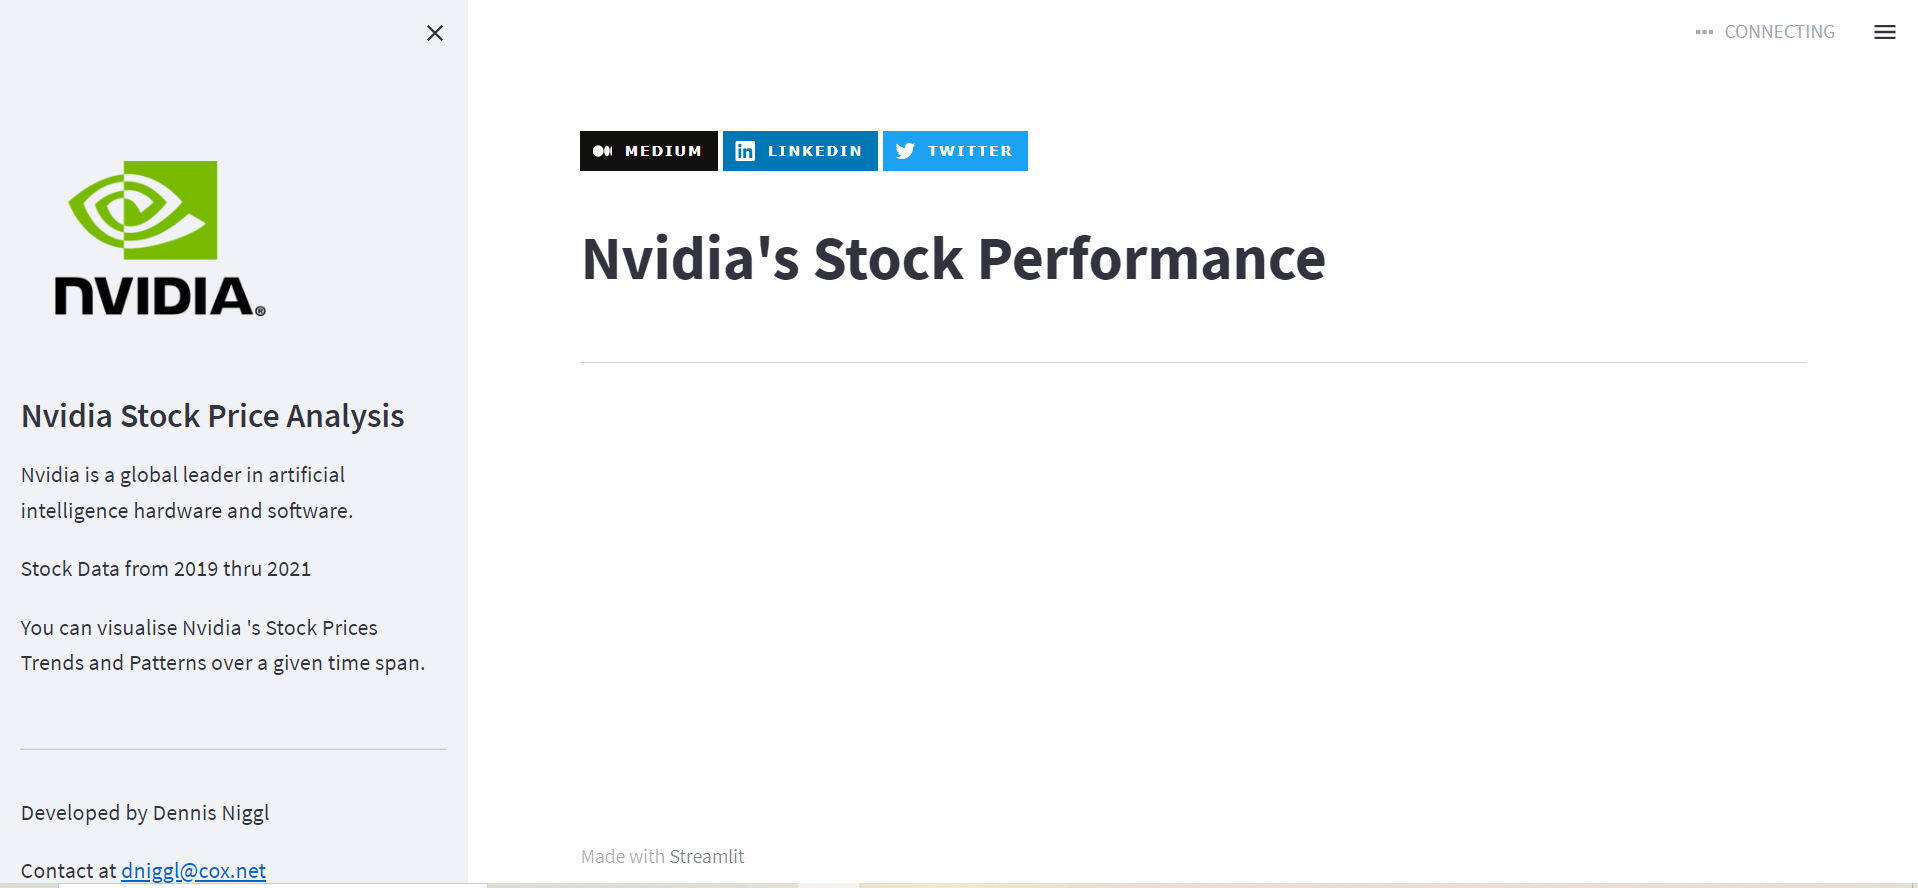

**Display some Data on the Web Page**

Let's look at the data and show some statistical information about the data.

In [ ]:
# Display the Data in the App.
st.subheader('Looking at the Data')
st.dataframe(df.head())

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
# Display statistical information on the dataset.
st.subheader('Statistical Info about the Data')
st.write(df.describe())

This code will produce the following items being displayed on the web page.

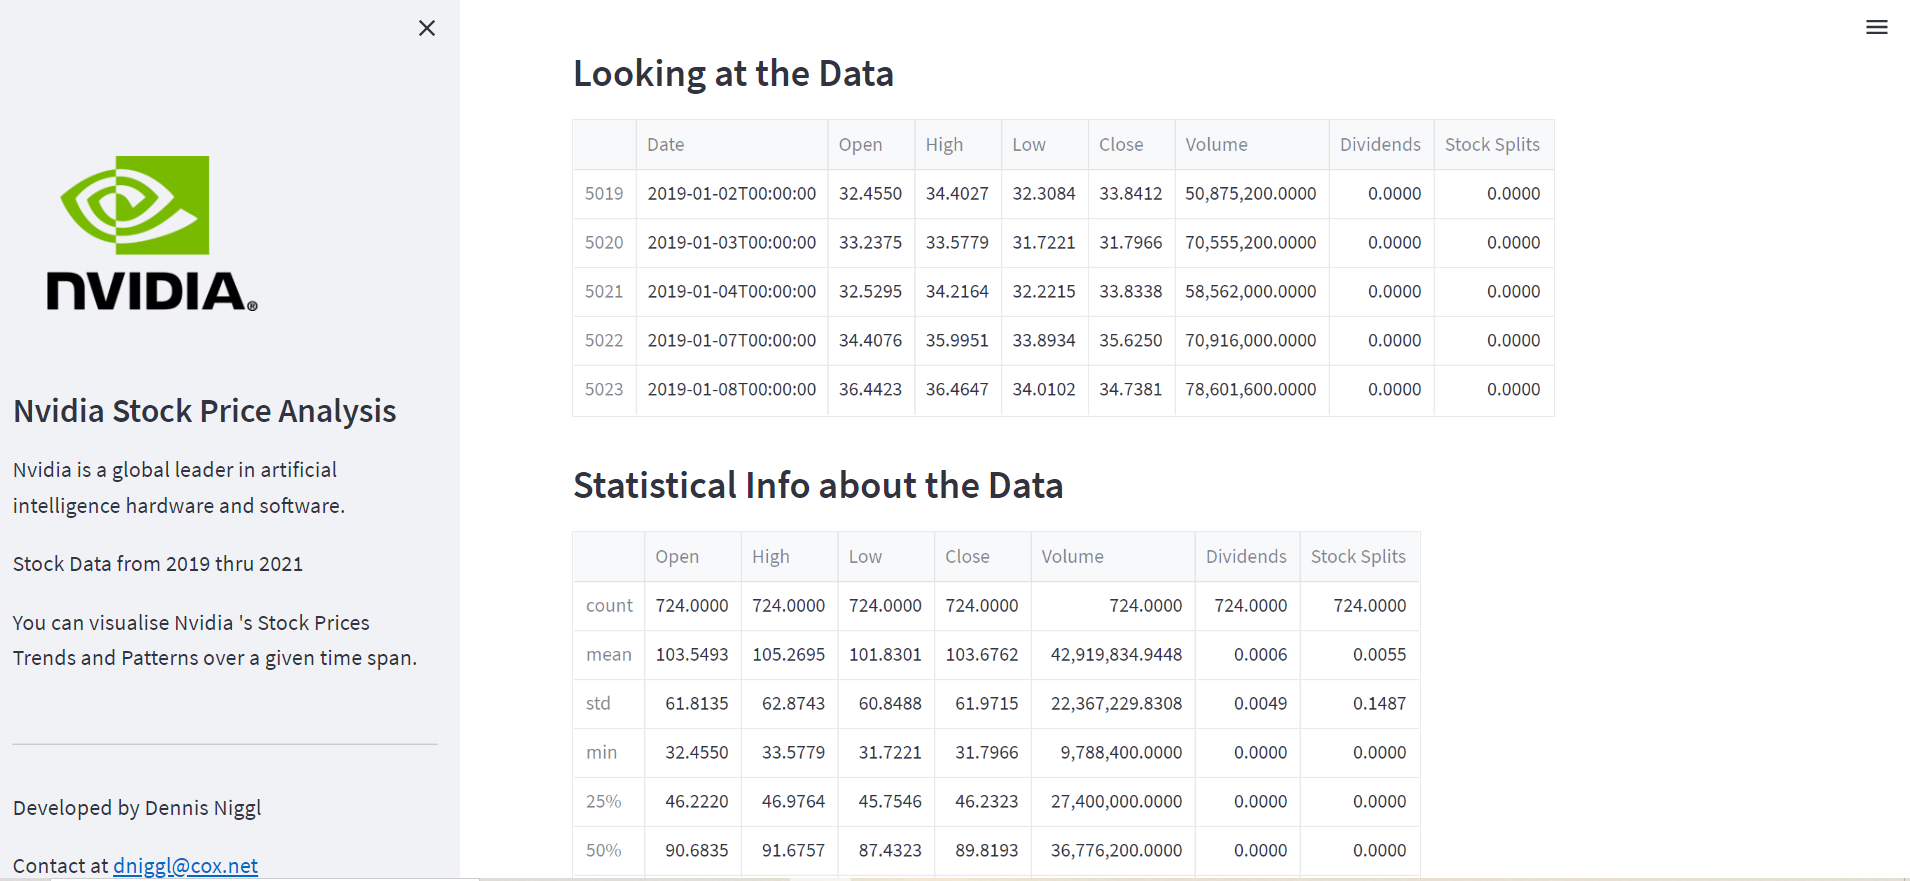

We will now add a filter that will give users the flexibility to select a date range for the data they want to analyze. This will provide insights for different time frames. 

In [ ]:
# Selection for a specific time frame.
st.subheader('Select a Date Range')
df_select = df 

col1, col2 = st.columns(2)

with col1:
    st.write('Select a Start Date')
    start_date = st.date_input('Start Date',min_value= datetime.date(2019,1,2),max_value=datetime.date(2021,11,12),value=datetime.date(2019,1,2))

with col2:    
    st.write('Select an End Date')
    end_date = st.date_input('End Date',min_value=datetime.date(1999,1,22),max_value=datetime.date(2021,11,12),value=datetime.date(2021,11,12))

if(start_date != None or end_date != None):
    if(start_date < end_date):
        df_select = df[start_date:end_date]
    else:
        st.warning("Invalid Date Range - Re-enter Dates")

This will result in the following items being displayed on the web page. In this example we have selected a start date of 11/02/2020 thru 11/12/2021.   

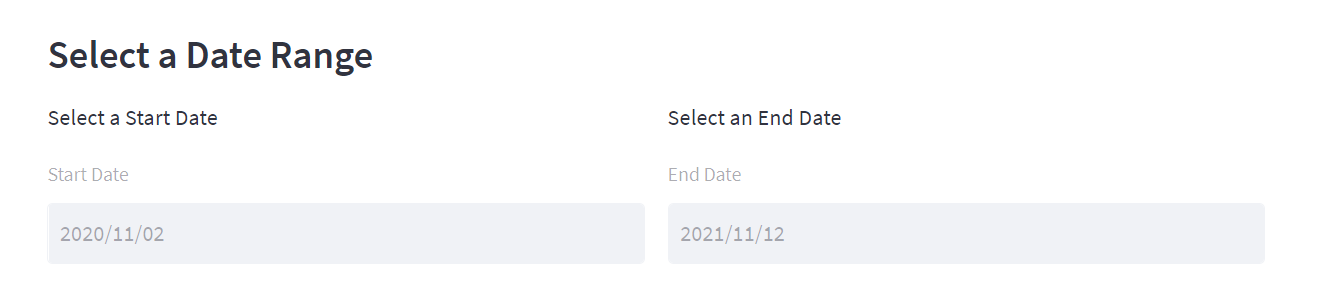

**Visualize the Stock Data** 

The following graphs and charts will show the performance of Nvidia stock prices from 11/02/2020 thru 11/12/2021. This will include open and close prices, high and low prices, daily volumn traded and moving averages of open and close prices.  

In [ ]:
# Open & Close Prices  
st.subheader("Open & Close Prices for Nvidia Stock")
st.markdown("\n\n")
st.line_chart(df_select[['Open','Close']])

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

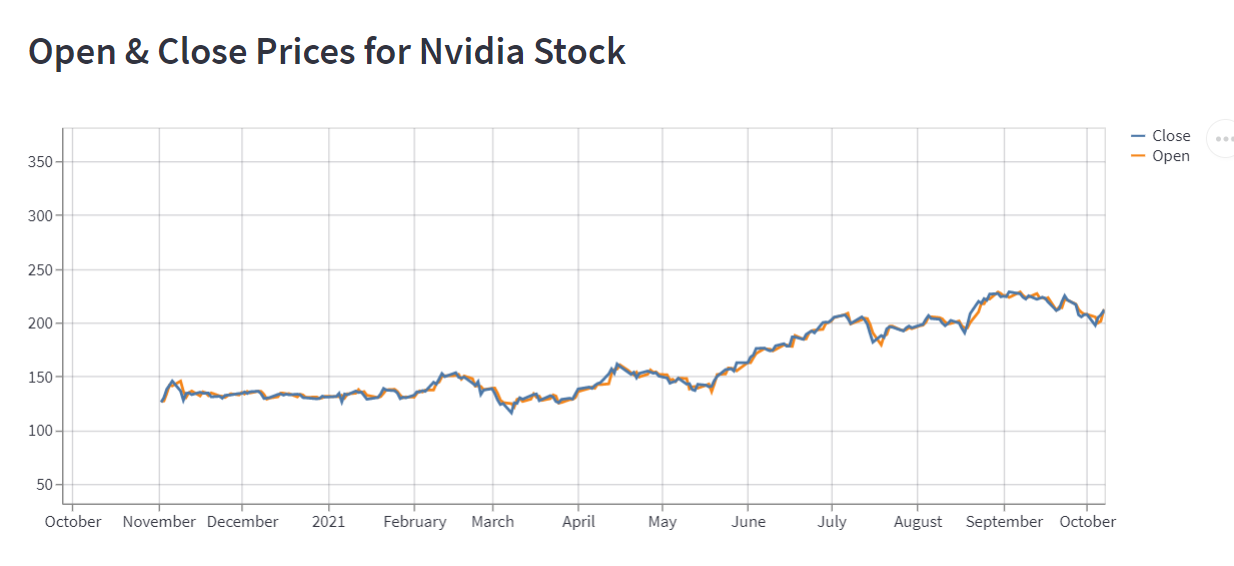

In [ ]:
# High and Low Values 
st.subheader("High and Low Prices for Nvidia Stock")
st.markdown("\n\n")
st.line_chart(df_select[['High', 'Low']])

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

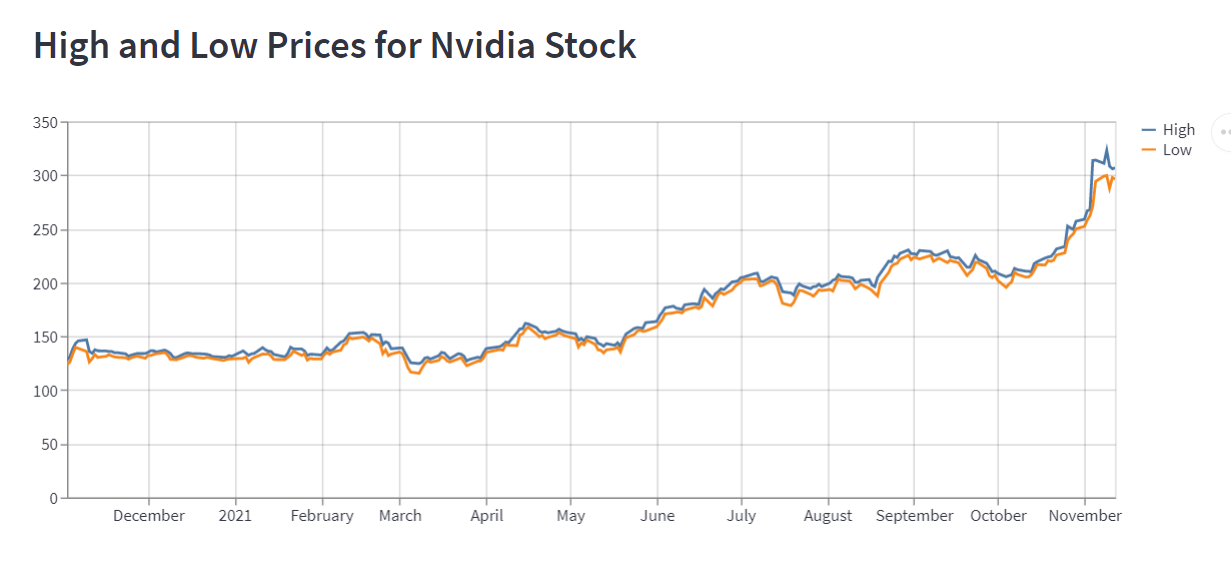

In [ ]:
# Volume of Stock Traded 
st.subheader("Volumn Traded for Nvidia Stock")
st.markdown("\n\n")
st.bar_chart(df_select['Volume'])

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

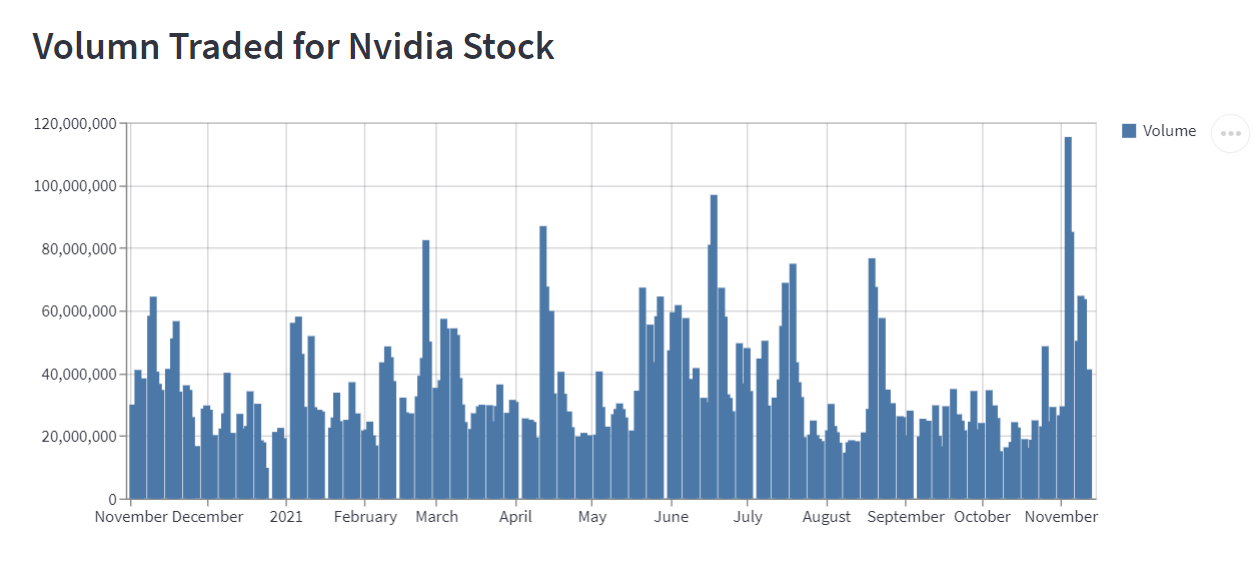

In [ ]:
# Moving average from 50 days to 250 days.
st.subheader('Moving Averages of Open and Closing Stock Prices')
movevavg_len = st.slider('Select the number of days for Moving Averages',min_value=0,max_value=250,value=50)
moveavg_oc =  df_select[['Open','Close']].rolling(50).mean()
st.line_chart(moveavg_oc)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

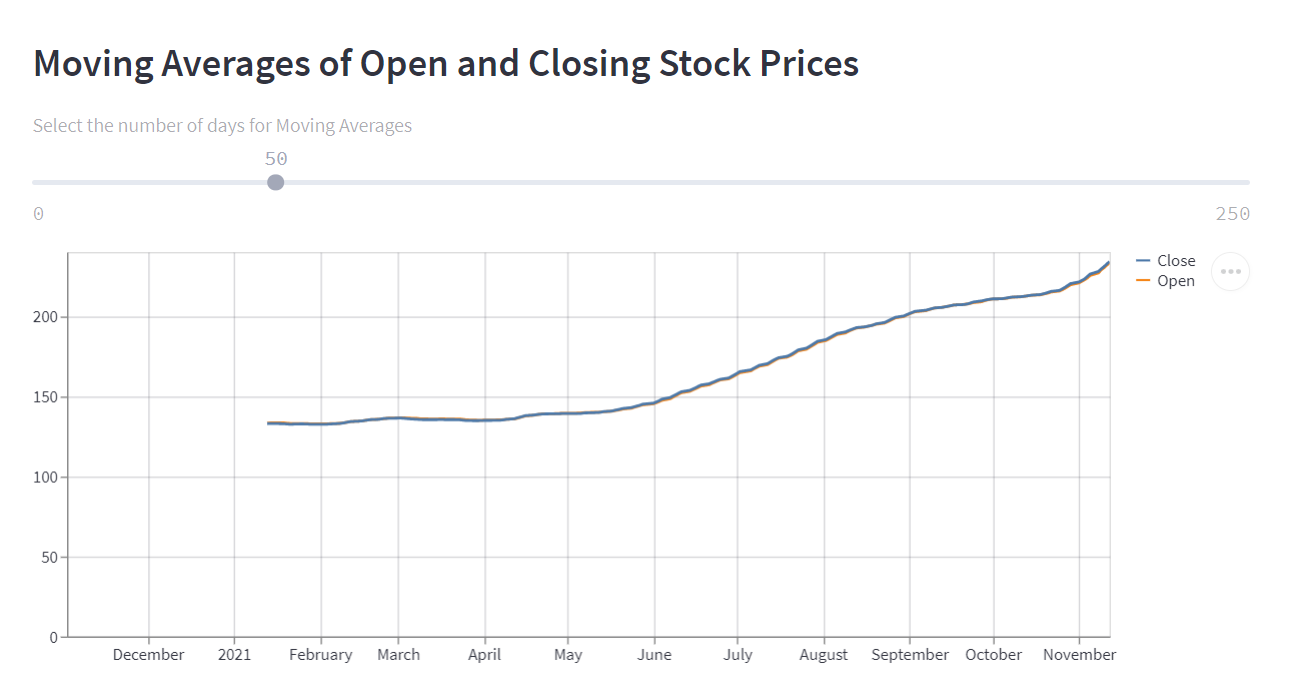

We now need to bundle all of our code shown above into a file (app.py) for streamlit processing. Note: prior to running this step be sure that Streamlit and Tornado packages are installed. Also, if you are running in Google Colab environment, load the dataset into Colab.      

In [ ]:
%%writefile app.py
# Import the libraries.
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Specify title and logo for the webpage.
st.set_page_config(page_title='Nvidia Stock Prices', 
page_icon='https://cdn.freebiesupply.com/logos/thumbs/1x/nvidia-logo.png', layout="wide")

# Add social media tags and links to the web page.
"""
[![Star](https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white)](https://medium.com/@dniggl)
[![Follow](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/dennisniggl)
[![Follow](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://twitter.com/DennisNiggl)

# Nvidia's Stock Performance

"""

# Add a sidebar to the web page. 
st.markdown('---')
# Sidebar Configuration
st.sidebar.image('https://cdn.freebiesupply.com/logos/thumbs/1x/nvidia-logo.png', width=200)
st.sidebar.markdown('# Nvidia Stock Price Analysis')
st.sidebar.markdown('Nvidia is a global leader in artificial intelligence hardware and software.')
st.sidebar.markdown('Stock Data from 2019 thru 2021')
st.sidebar.markdown('You can visualise Nvidia \'s Stock Prices Trends and Patterns over a given time span.') 

st.sidebar.markdown('---')
st.sidebar.write('Developed by Dennis Niggl')
st.sidebar.write('Contact at dniggl@cox.net')

# Import the dataset into a dataframe. 
df = pd.read_csv('NVidia_stock_history.csv')

# Delete rows where date is before 1/1/2019.
df['Date'] = pd.to_datetime(df['Date'])
df = df[~(df['Date'] < '2019-01-01')]

# Reset the index to the Date column. 
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')
df.reset_index(drop=True,inplace=True)
df.set_index('Date',inplace=True)

# Display the Data in the App
st.subheader('Looking at the Data')
st.dataframe(df.head())

# Display statistical information on the dataset
st.subheader('Statistical Info about the Data')
st.write(df.describe())

# Selection for a specific time frame.
st.subheader('Select a Date Range')
df_select = df

col1, col2 = st.columns(2)

with col1:
    st.write('Select a Start Date')
    start_date = st.date_input('Start Date',min_value= datetime.date(2019,1,2),max_value=datetime.date(2021,11,12),value=datetime.date(2019,1,2))

with col2:    
    st.write('Select an End Date')
    end_date = st.date_input('End Date',min_value=datetime.date(1999,1,22),max_value=datetime.date(2021,11,12),value=datetime.date(2021,11,12))

if(start_date != None or end_date != None):
    if(start_date < end_date):
        df_select = df[start_date:end_date]
    else:
        st.warning("Invalid Date Range - Re-enter Dates")

# Graphs and charts for selected date range.

# Open & Close Prices.  
st.subheader("Open & Close Prices for Nvidia Stock")
st.markdown("\n\n")
st.line_chart(df_select[['Open','Close']])

# High and Low Values 
st.subheader("High and Low Prices for Nvidia Stock")
st.markdown("\n\n")
st.line_chart(df_select[['High', 'Low']])

# Volume of Stock Traded 
st.subheader("Volumn Traded for Nvidia Stock")
st.markdown("\n\n")
st.bar_chart(df_select['Volume'])

# Moving average from 50 days to 250 days.
st.subheader('Moving Averages of Open and Closing Stock Prices')
movevavg_len = st.slider('Select the number of days for Moving Averages',min_value=0,max_value=250,value=50)
moveavg_oc =  df_select[['Open','Close']].rolling(50).mean()
st.line_chart(moveavg_oc)


Writing app.py


We will now run the streamlit application which will process the file created in the previous step using the local tunnel. Local tunnel exposes your local host to the world for testing and sharing.

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

After the streamlit application runs you will see the screen below. You can view the web page that was created by clicking on your url link.  

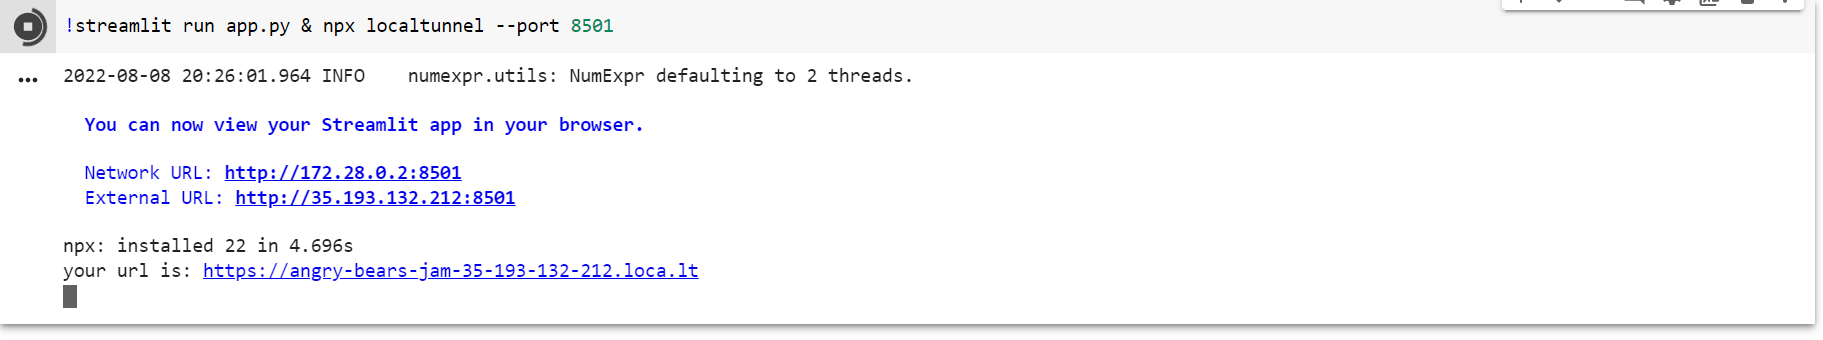

After selecting your url link you will see the screen shown below. This is informational and a reminder to verify the website address for security purposes. The web page also includes some options to bypass this page. For now, just select the Click to Continue button. 

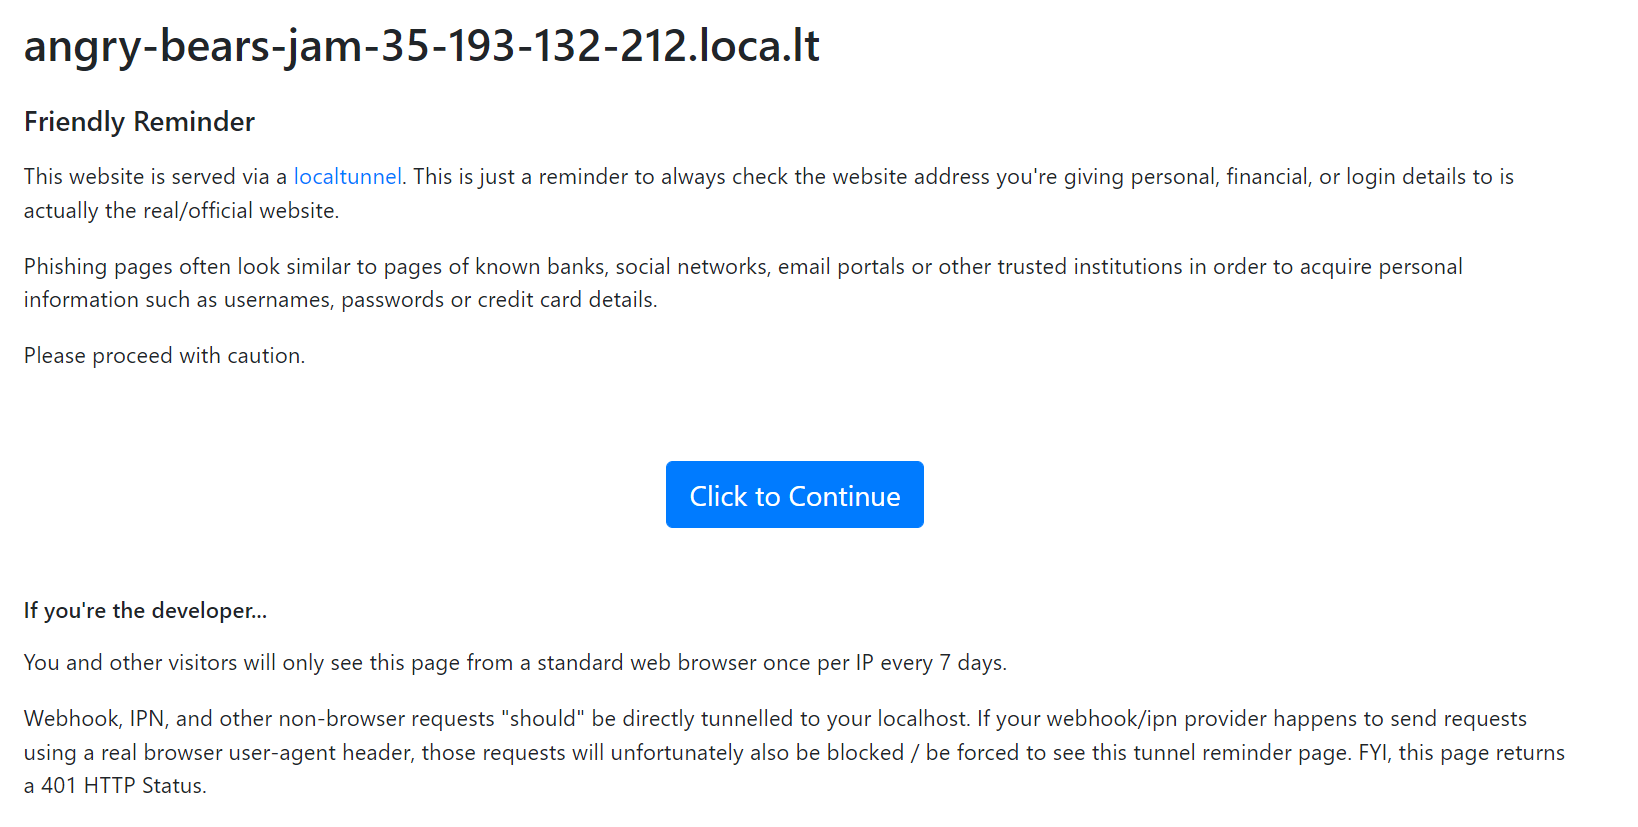

The newly created web page will display the screen images shown above. This  includes title, logo, social media tags, sidebar, stock data, statistics, date range selection, and graphs and charts.     

We have now completed developing a web app using python and the streamlit framework! You can deploy your web application on the Streamlit cloud platform for free. Streamlit Cloud is a workspace for you to deploy, manage, and collaborate with others on your Streamlit app. You deploy your app by setting up a streamlit cloud account, add your app and dependencies to your Github account, and deploy your app from Github by specifying the repository, branch and main file path. You can find more details for deployment at the following link. https://docs.streamlit.io/streamlit-cloud/get-started/deploy-an-app      